# Neural Nets (pt.3), Interpretability and Convolutional Neural Networks

In [1]:
# Ref: https://medium.com/biaslyai/pytorch-introduction-to-neural-network-feedforward-neural-network-model-e7231cff47cb

'''
Packages

conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch
conda install -c anaconda scikit-learn
conda install pandas
'''

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(66522, 22)
          x          y      h     minSVVI     medSVVI     maxSVVI  treecover  \
0  6.894317  49.482459   2.73  176.799316  233.790283  128.065918         61   
1  7.023274  49.510552  10.75  495.294678  555.553955  680.410400         36   
2  7.394650  49.590488  21.20  172.081299  122.683594  231.771484        100   
3  7.396895  49.590968  20.00  278.890625   12.374756   25.781250         83   
4  7.397643  49.591128  24.23  305.592651   26.431641   20.360352         79   

   forest_height  CHELSA_bio18  CHELSA_bio4  ...  northness  eastness  \
0             19          2251         6208  ...  -0.041041 -0.107523   
1             11          2336         6144  ...   0.060015 -0.031948   
2             20          2067         6194  ...   0.104165  0.049155   
3             26          2067         6194  ...   0.073083  0.041050   
4             26          2067         6194  ...   0.042943  0.064307   

    elevation  outlet_dist_dw_basin        cti  BLDFIE  ORCDRC  CECS

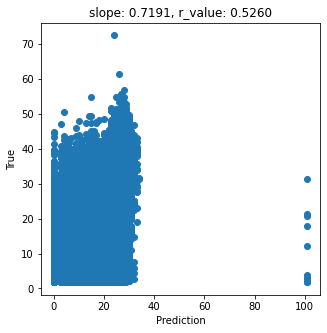

In [5]:
#What are we trying to beat
data = pd.read_csv('./tree_height/txt/eu_x_y_height_predictors.txt',  sep=" ")
# data = pd.read_csv('./tree_height/txt/eu_x_y_height.txt',  sep=" ")
print(data.shape)
print(data.head())

y_true = data['h']
y_pred = data['forest_height']

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_true)

fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.scatter(y_pred, y_true)
ax.set_xlabel('Prediction')
ax.set_ylabel('True')
ax.set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
plt.show()

In [6]:
tree_height = data['h'].to_numpy()
data = data.drop('h', 1)
data = data.drop('forest_height',1)
print(data.head())

          x          y     minSVVI     medSVVI     maxSVVI  treecover  \
0  6.894317  49.482459  176.799316  233.790283  128.065918         61   
1  7.023274  49.510552  495.294678  555.553955  680.410400         36   
2  7.394650  49.590488  172.081299  122.683594  231.771484        100   
3  7.396895  49.590968  278.890625   12.374756   25.781250         83   
4  7.397643  49.591128  305.592651   26.431641   20.360352         79   

   CHELSA_bio18  CHELSA_bio4  dev-magnitude  convergence  northness  eastness  \
0          2251         6208       0.774696    -5.247141  -0.041041 -0.107523   
1          2336         6144      -1.088770    44.009472   0.060015 -0.031948   
2          2067         6194       0.892866    -2.490510   0.104165  0.049155   
3          2067         6194       0.893981     4.893103   0.073083  0.041050   
4          2067         6194       0.856278    -4.858290   0.042943  0.064307   

    elevation  outlet_dist_dw_basin        cti  BLDFIE  ORCDRC  CECSOL  \


/var/folders/96/dnthcv6d22j1gtb3t_m_txr00000gn/T/ipykernel_84192/3688197143.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('h', 1)
/var/folders/96/dnthcv6d22j1gtb3t_m_txr00000gn/T/ipykernel_84192/3688197143.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('forest_height',1)


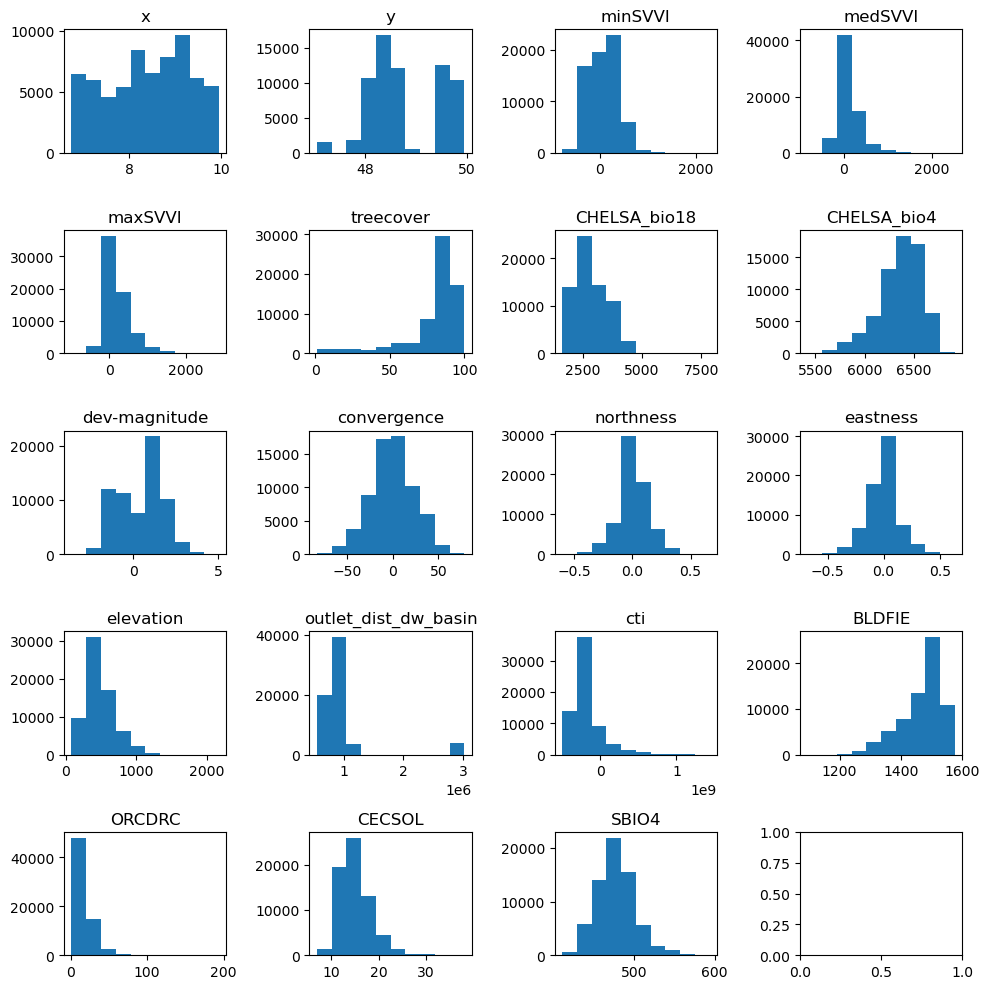

In [7]:
#Explore the raw data
# data = data.to_numpy()
n_plots_x = int(np.ceil(np.sqrt(data.shape[1])))
n_plots_y = int(np.floor(np.sqrt(data.shape[1])))
fig, ax = plt.subplots(n_plots_x, n_plots_y, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
ax=ax.ravel()
for idx in range(data.shape[1]-1):
    ax[idx].hist(data.iloc[:, idx].to_numpy().flatten())
    ax[idx].set_title(data.columns[idx])
    # plt.scatter(to_np(times)[:extrapolation_points],obs_print[:extrapolation_points,0]*scaling_factor,label='Data',c='blue')
    # ax[idx].scatter(time_to_print[:],obs_to_print[:,idx],label='Data',c='blue', alpha=0.5)
    # ax[idx].set_xlabel("Time")
    # ax[idx].set_ylabel("dim"+str(idx))
    #plt.scatter(to_np(times)[extrapolation_points:],obs_print[extrapolation_points:,0,0],label='Data extr',c='red')
    # ax[idx].legend()
    # timestr = time.strftime("%Y%m%d-%H%M%S")
fig.tight_layout()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 6.500e+01, 1.240e+02,
        2.050e+02, 3.430e+02, 3.760e+02, 8.450e+02, 1.115e+03, 1.770e+03,
        2.175e+03, 2.876e+03, 3.571e+03, 4.227e+03, 4.866e+03, 5.195e+03,
        5.512e+03, 5.437e+03, 5.233e+03, 4.862e+03, 4.215e+03, 3.589e+03,
        2.862e+03, 2.204e+03, 1.663e+03, 1.150e+03, 8.020e+02, 5.080e+02,
        3.100e+02, 1.950e+02, 1.890e+02, 3.400e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,

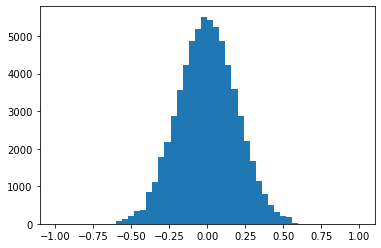

In [8]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=0
)

# X_train, X_test = train_test_split(data, test_size=0.5)
# data = qt.fit_transform(data)
tree_height = qt.fit_transform(tree_height.reshape(-1,1))
scaler_tree = MinMaxScaler()
tree_height = scaler_tree.fit_transform(tree_height).squeeze()
tree_height = ((tree_height-tree_height.min())/(tree_height.max()-tree_height.min()))*2-1
# data[:,2] = data[:,2]/np.quantile(np.abs(data[:,2]),0.99)
tree_height = tree_height/tree_height.max()
plt.hist(tree_height,50)

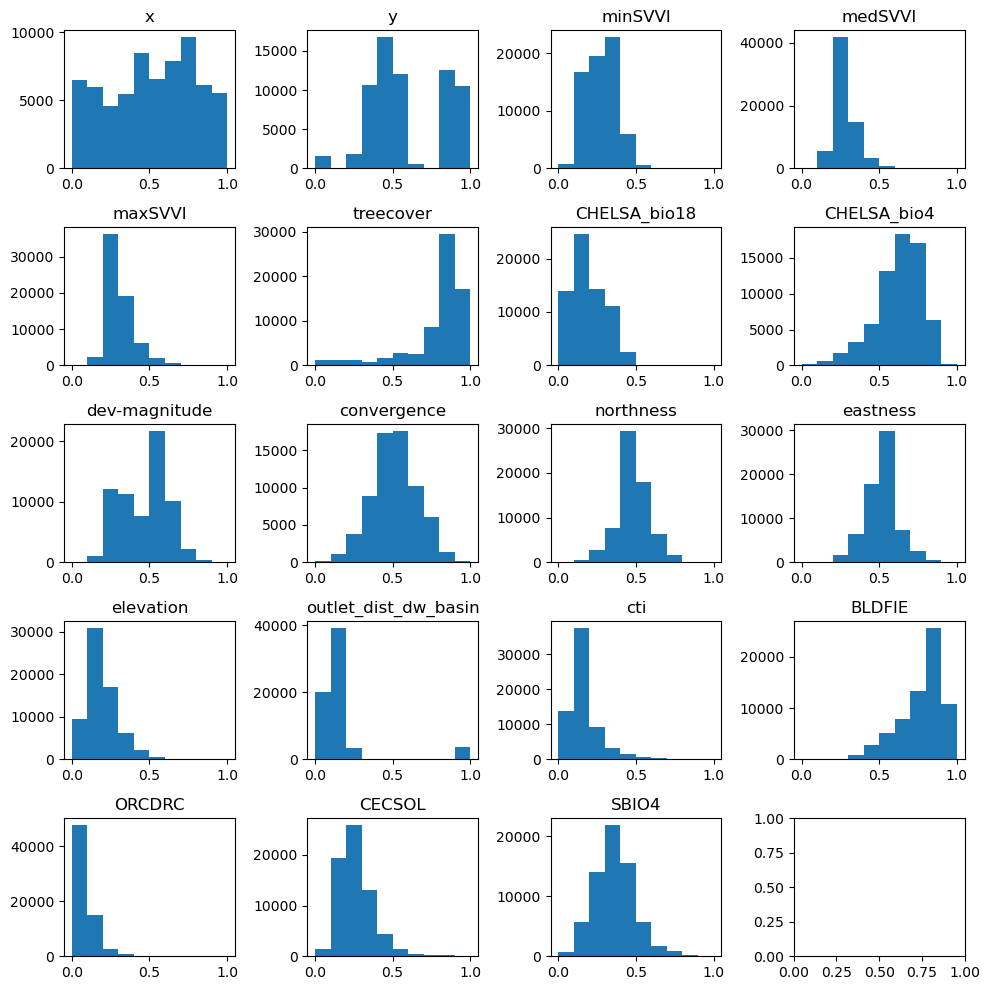

In [9]:
#Normalize the data
scaler_data = MinMaxScaler()
data_transformed = scaler_data.fit_transform(data)

n_plots_x = int(np.ceil(np.sqrt(data.shape[1])))
n_plots_y = int(np.floor(np.sqrt(data.shape[1])))
fig, ax = plt.subplots(n_plots_x, n_plots_y, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
ax=ax.ravel()
for idx in range(data.shape[1]-1):
    ax[idx].hist(data_transformed[:,idx].flatten())
    ax[idx].set_title(data.columns[idx])
    # plt.scatter(to_np(times)[:extrapolation_points],obs_print[:extrapolation_points,0]*scaling_factor,label='Data',c='blue')
    # ax[idx].scatter(time_to_print[:],obs_to_print[:,idx],label='Data',c='blue', alpha=0.5)
    # ax[idx].set_xlabel("Time")
    # ax[idx].set_ylabel("dim"+str(idx))
    #plt.scatter(to_np(times)[extrapolation_points:],obs_print[extrapolation_points:,0,0],label='Data extr',c='red')
    # ax[idx].legend()
    # timestr = time.strftime("%Y%m%d-%H%M%S")
fig.tight_layout()

In [10]:
# Let's use all the data as one big minibatch

#Split the data
X_train, X_test, y_train, y_test = train_test_split(data_transformed,tree_height, test_size=0.30, random_state=0)
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)
print('X_train.shape: {}, X_test.shape: {}, y_train.shape: {}, y_test.shape: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
print('X_train.min: {}, X_test.shape: {}, y_train.shape: {}, y_test.shape: {}'.format(X_train.min(), X_test.min(), y_train.min(), y_test.min()))
print('X_train.max: {}, X_test.shape: {}, y_train.shape: {}, y_test.shape: {}'.format(X_train.max(), X_test.max(), y_train.max(), y_test.max()))

X_train.shape: torch.Size([46565, 20]), X_test.shape: torch.Size([19957, 20]), y_train.shape: torch.Size([46565]), y_test.shape: torch.Size([19957])
X_train.min: 0.0, X_test.shape: 0.0, y_train.shape: -0.6420077085494995, y_test.shape: -1.0
X_train.max: 1.0, X_test.shape: 1.0, y_train.shape: 1.0, y_test.shape: 0.57742840051651


In [11]:
# Create the model
class Perceptron(torch.nn.Module):
    def __init__(self,input_size, output_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size,output_size)
        self.relu = torch.nn.ReLU() # instead of Heaviside step fn
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        # print('x.shape: ',x.shape)
        # print('x: ',x)
        output = self.tanh(self.fc(x))
        # print('output.shape: ',output.shape)
        # print('output: ',output)
        # output = self.tanh(output) # instead of Heaviside step fn
        # print('output: ',output)
        return output


hid_dim: 1, lr: 0.5
Epoch 0, train_loss: 0.0532, val_loss: 0.1638, r_value: -0.0623
Epoch 100, train_loss: 0.1954, val_loss: 0.7130, r_value: 0.4214
Epoch 200, train_loss: 0.2813, val_loss: 0.6098, r_value: 0.3794
Epoch 300, train_loss: 0.3224, val_loss: 0.4925, r_value: 0.3421
Epoch 400, train_loss: 0.3879, val_loss: 0.4200, r_value: 0.3869
Epoch 500, train_loss: 0.4980, val_loss: 0.2536, r_value: 0.4959
Epoch 600, train_loss: 0.4884, val_loss: 0.2459, r_value: 0.5049
Epoch 700, train_loss: 0.4477, val_loss: 0.2981, r_value: 0.5021
Epoch 800, train_loss: 0.4495, val_loss: 0.2921, r_value: 0.5036
Epoch 900, train_loss: 0.4519, val_loss: 0.2866, r_value: 0.5047
Epoch 1000, train_loss: 0.4544, val_loss: 0.2813, r_value: 0.5056
Epoch 1100, train_loss: 0.4571, val_loss: 0.2761, r_value: 0.5063
Epoch 1200, train_loss: 0.4599, val_loss: 0.2711, r_value: 0.5068
Epoch 1300, train_loss: 0.4627, val_loss: 0.2662, r_value: 0.5074
Epoch 1400, train_loss: 0.4655, val_loss: 0.2615, r_value: 0.5078


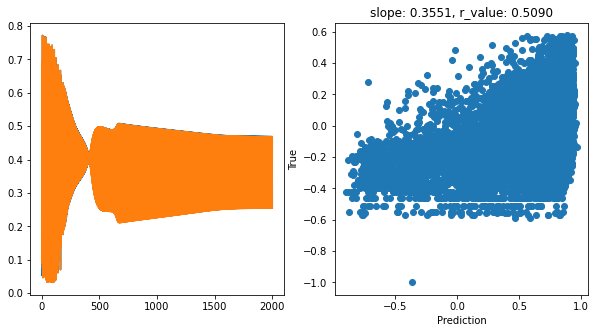


hid_dim: 1, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.1608, val_loss: 0.0436, r_value: 0.0382
Epoch 100, train_loss: 0.0303, val_loss: 0.0298, r_value: 0.4364
Epoch 200, train_loss: 0.0281, val_loss: 0.0277, r_value: 0.4957
Epoch 300, train_loss: 0.0274, val_loss: 0.0270, r_value: 0.5121
Epoch 400, train_loss: 0.0271, val_loss: 0.0267, r_value: 0.5195
Epoch 500, train_loss: 0.0269, val_loss: 0.0265, r_value: 0.5238
Epoch 600, train_loss: 0.0268, val_loss: 0.0264, r_value: 0.5267
Epoch 700, train_loss: 0.0267, val_loss: 0.0263, r_value: 0.5288
Epoch 800, train_loss: 0.0266, val_loss: 0.0263, r_value: 0.5303
Epoch 900, train_loss: 0.0266, val_loss: 0.0262, r_value: 0.5315
Epoch 1000, train_loss: 0.0266, val_loss: 0.0262, r_value: 0.5325
Epoch 1100, train_loss: 0.0265, val_loss: 0.0261, r_value: 0.5333
Epoch 1200, train_loss: 0.0265, val_loss: 0.0261, r_value: 0.5339
Epoch 1300, train_loss: 0.0265, val_loss: 0.0261, r_value: 0.5344
Epoch 1400, train_loss: 0.0264, val_loss: 0

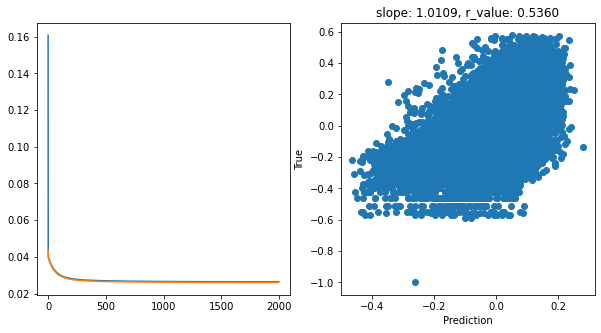


hid_dim: 1, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0635, val_loss: 0.0618, r_value: -0.2940
Epoch 100, train_loss: 0.0521, val_loss: 0.0517, r_value: -0.2424
Epoch 200, train_loss: 0.0485, val_loss: 0.0482, r_value: -0.1854
Epoch 300, train_loss: 0.0455, val_loss: 0.0452, r_value: -0.1220
Epoch 400, train_loss: 0.0430, val_loss: 0.0426, r_value: -0.0548
Epoch 500, train_loss: 0.0408, val_loss: 0.0405, r_value: 0.0133
Epoch 600, train_loss: 0.0390, val_loss: 0.0387, r_value: 0.0791
Epoch 700, train_loss: 0.0374, val_loss: 0.0371, r_value: 0.1400
Epoch 800, train_loss: 0.0361, val_loss: 0.0358, r_value: 0.1946
Epoch 900, train_loss: 0.0350, val_loss: 0.0347, r_value: 0.2422
Epoch 1000, train_loss: 0.0340, val_loss: 0.0337, r_value: 0.2829
Epoch 1100, train_loss: 0.0332, val_loss: 0.0329, r_value: 0.3175
Epoch 1200, train_loss: 0.0324, val_loss: 0.0321, r_value: 0.3466
Epoch 1300, train_loss: 0.0318, val_loss: 0.0315, r_value: 0.3711
Epoch 1400, train_loss: 0.0313, val_l

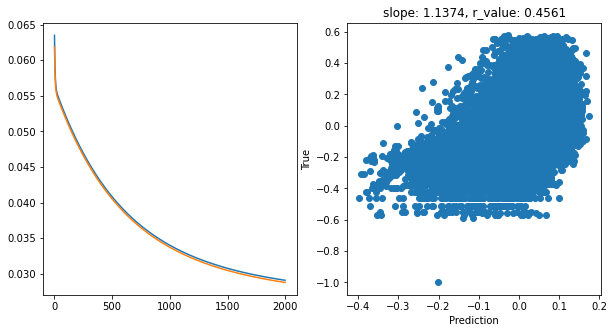

In [12]:
# model.train()
epoch = 2000
hid_dim_range = [1]#,256,512]
lr_range = [0.5,0.1,0.01]#,0.05,0.001]

for hid_dim in hid_dim_range:
    for lr in lr_range:
        print('\nhid_dim: {}, lr: {}'.format(hid_dim, lr))
        if 'model' in globals():
            print('Deleting previous model')
            del model, criterion, optimizer
        model = Perceptron(data.shape[1], hid_dim)
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr = lr)

        all_loss_train=[]
        all_loss_val=[]
        for epoch in range(epoch):
            model.train()
            optimizer.zero_grad()
            # Forward pass
            y_pred = model(X_train)
            # Compute Loss
            loss = criterion(y_pred.squeeze(), y_train)

            # Backward pass
            loss.backward()
            optimizer.step()

            all_loss_train.append(loss.item())

            model.eval()
            with torch.no_grad():
                y_pred = model(X_test)
                # Compute Loss
                loss = criterion(y_pred.squeeze(), y_test)
                all_loss_val.append(loss.item())
            
                if epoch%100==0:
                    y_pred = y_pred.detach().numpy().squeeze()
                    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_test)
                    print('Epoch {}, train_loss: {:.4f}, val_loss: {:.4f}, r_value: {:.4f}'.format(epoch,all_loss_train[-1],all_loss_val[-1],r_value))
                
        fig,ax=plt.subplots(1,2,figsize=(10,5))
        ax[0].plot(all_loss_train)
        ax[0].plot(all_loss_val)

        ax[1].scatter(y_pred, y_test)
        ax[1].set_xlabel('Prediction')
        ax[1].set_ylabel('True')
        ax[1].set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
        plt.show()

In [13]:
# Try with FF
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        # self.fc3 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        # self.fc4 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        hidden = self.relu(self.fc1(x))
        hidden = self.relu(self.fc2(hidden))
        # hidden = self.relu(self.fc3(hidden))
        # hidden = self.relu(self.fc4(hidden))
        output = self.tanh(self.fc3(hidden))

        return output


hid_dim: 128, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0403, val_loss: 0.0977, r_value: 0.2438
Epoch 100, train_loss: 0.0345, val_loss: 0.0356, r_value: 0.4551
Epoch 200, train_loss: 0.0327, val_loss: 0.0337, r_value: 0.4872
Epoch 300, train_loss: 0.0322, val_loss: 0.0327, r_value: 0.5180
Epoch 400, train_loss: 0.0316, val_loss: 0.0318, r_value: 0.5361
Epoch 500, train_loss: 0.0307, val_loss: 0.0308, r_value: 0.5470
Epoch 600, train_loss: 0.0300, val_loss: 0.0300, r_value: 0.5541
Epoch 700, train_loss: 0.0294, val_loss: 0.0293, r_value: 0.5589
Epoch 800, train_loss: 0.0288, val_loss: 0.0287, r_value: 0.5628
Epoch 900, train_loss: 0.0284, val_loss: 0.0283, r_value: 0.5659
Epoch 1000, train_loss: 0.0280, val_loss: 0.0279, r_value: 0.5685
Epoch 1100, train_loss: 0.0277, val_loss: 0.0277, r_value: 0.5706
Epoch 1200, train_loss: 0.0275, val_loss: 0.0274, r_value: 0.5724
Epoch 1300, train_loss: 0.0273, val_loss: 0.0272, r_value: 0.5741
Epoch 1400, train_loss: 0.0271, val_loss

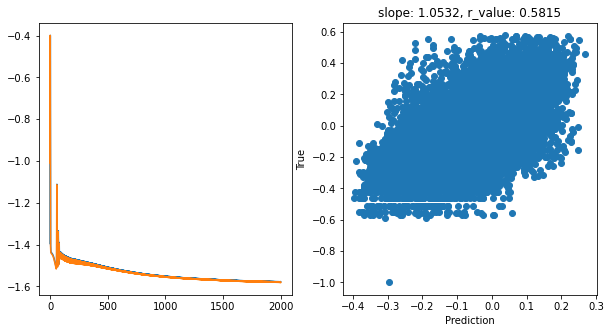


hid_dim: 128, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0385, val_loss: 0.0446, r_value: 0.2170
Epoch 100, train_loss: 0.0314, val_loss: 0.0298, r_value: 0.4997
Epoch 200, train_loss: 0.0292, val_loss: 0.0285, r_value: 0.5248
Epoch 300, train_loss: 0.0283, val_loss: 0.0277, r_value: 0.5393
Epoch 400, train_loss: 0.0277, val_loss: 0.0273, r_value: 0.5491
Epoch 500, train_loss: 0.0273, val_loss: 0.0268, r_value: 0.5554
Epoch 600, train_loss: 0.0269, val_loss: 0.0265, r_value: 0.5596
Epoch 700, train_loss: 0.0265, val_loss: 0.0262, r_value: 0.5628
Epoch 800, train_loss: 0.0263, val_loss: 0.0259, r_value: 0.5653
Epoch 900, train_loss: 0.0260, val_loss: 0.0258, r_value: 0.5674
Epoch 1000, train_loss: 0.0259, val_loss: 0.0256, r_value: 0.5693
Epoch 1100, train_loss: 0.0257, val_loss: 0.0254, r_value: 0.5711
Epoch 1200, train_loss: 0.0255, val_loss: 0.0253, r_value: 0.5727
Epoch 1300, train_loss: 0.0254, val_loss: 0.0252, r_value: 0.5742
Epoch 1400, train_loss: 0.0253, val_loss:

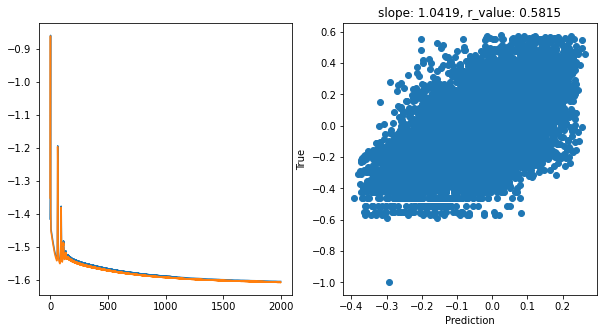


hid_dim: 128, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0375, val_loss: 0.0367, r_value: -0.0293
Epoch 100, train_loss: 0.0315, val_loss: 0.0311, r_value: 0.4840
Epoch 200, train_loss: 0.0286, val_loss: 0.0282, r_value: 0.5040
Epoch 300, train_loss: 0.0274, val_loss: 0.0271, r_value: 0.5148
Epoch 400, train_loss: 0.0270, val_loss: 0.0266, r_value: 0.5230
Epoch 500, train_loss: 0.0267, val_loss: 0.0263, r_value: 0.5301
Epoch 600, train_loss: 0.0264, val_loss: 0.0261, r_value: 0.5359
Epoch 700, train_loss: 0.0262, val_loss: 0.0259, r_value: 0.5404
Epoch 800, train_loss: 0.0261, val_loss: 0.0258, r_value: 0.5439
Epoch 900, train_loss: 0.0260, val_loss: 0.0256, r_value: 0.5468
Epoch 1000, train_loss: 0.0259, val_loss: 0.0255, r_value: 0.5493
Epoch 1100, train_loss: 0.0258, val_loss: 0.0254, r_value: 0.5514
Epoch 1200, train_loss: 0.0257, val_loss: 0.0254, r_value: 0.5532
Epoch 1300, train_loss: 0.0256, val_loss: 0.0253, r_value: 0.5547
Epoch 1400, train_loss: 0.0255, val_loss

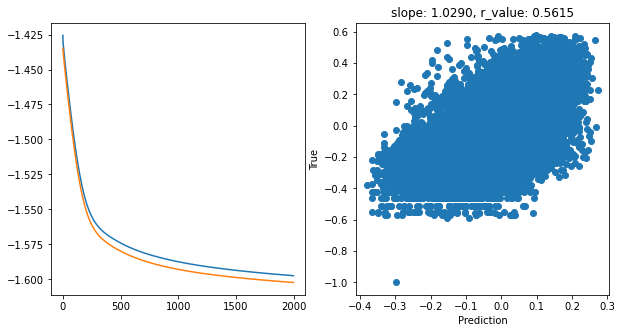


hid_dim: 256, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0403, val_loss: 0.0921, r_value: 0.0286
Epoch 100, train_loss: 0.0349, val_loss: 0.0329, r_value: 0.4931
Epoch 200, train_loss: 0.0336, val_loss: 0.0321, r_value: 0.5201
Epoch 300, train_loss: 0.0325, val_loss: 0.0315, r_value: 0.5385
Epoch 400, train_loss: 0.0313, val_loss: 0.0306, r_value: 0.5499
Epoch 500, train_loss: 0.0303, val_loss: 0.0298, r_value: 0.5571
Epoch 600, train_loss: 0.0295, val_loss: 0.0291, r_value: 0.5621
Epoch 700, train_loss: 0.0289, val_loss: 0.0286, r_value: 0.5659
Epoch 800, train_loss: 0.0284, val_loss: 0.0281, r_value: 0.5691
Epoch 900, train_loss: 0.0280, val_loss: 0.0278, r_value: 0.5719
Epoch 1000, train_loss: 0.0278, val_loss: 0.0275, r_value: 0.5743
Epoch 1100, train_loss: 0.0275, val_loss: 0.0273, r_value: 0.5765
Epoch 1200, train_loss: 0.0273, val_loss: 0.0271, r_value: 0.5785
Epoch 1300, train_loss: 0.0272, val_loss: 0.0269, r_value: 0.5803
Epoch 1400, train_loss: 0.0270, val_loss

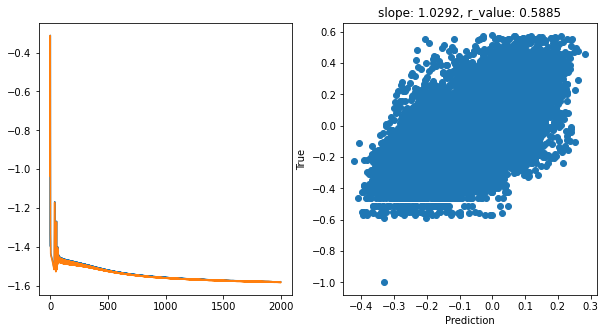


hid_dim: 256, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0382, val_loss: 0.0552, r_value: 0.1675
Epoch 100, train_loss: 0.0382, val_loss: 0.0346, r_value: 0.5131
Epoch 200, train_loss: 0.0292, val_loss: 0.0283, r_value: 0.5328
Epoch 300, train_loss: 0.0282, val_loss: 0.0275, r_value: 0.5474
Epoch 400, train_loss: 0.0275, val_loss: 0.0270, r_value: 0.5569
Epoch 500, train_loss: 0.0269, val_loss: 0.0265, r_value: 0.5631
Epoch 600, train_loss: 0.0265, val_loss: 0.0261, r_value: 0.5675
Epoch 700, train_loss: 0.0261, val_loss: 0.0258, r_value: 0.5709
Epoch 800, train_loss: 0.0258, val_loss: 0.0256, r_value: 0.5737
Epoch 900, train_loss: 0.0256, val_loss: 0.0254, r_value: 0.5761
Epoch 1000, train_loss: 0.0254, val_loss: 0.0252, r_value: 0.5782
Epoch 1100, train_loss: 0.0253, val_loss: 0.0251, r_value: 0.5801
Epoch 1200, train_loss: 0.0252, val_loss: 0.0250, r_value: 0.5819
Epoch 1300, train_loss: 0.0250, val_loss: 0.0249, r_value: 0.5835
Epoch 1400, train_loss: 0.0249, val_loss:

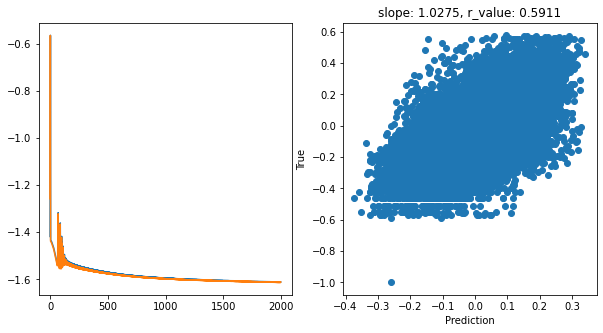


hid_dim: 256, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0383, val_loss: 0.0366, r_value: 0.0119
Epoch 100, train_loss: 0.0293, val_loss: 0.0289, r_value: 0.4922
Epoch 200, train_loss: 0.0274, val_loss: 0.0271, r_value: 0.5165
Epoch 300, train_loss: 0.0267, val_loss: 0.0264, r_value: 0.5302
Epoch 400, train_loss: 0.0263, val_loss: 0.0260, r_value: 0.5387
Epoch 500, train_loss: 0.0261, val_loss: 0.0257, r_value: 0.5446
Epoch 600, train_loss: 0.0259, val_loss: 0.0256, r_value: 0.5488
Epoch 700, train_loss: 0.0257, val_loss: 0.0254, r_value: 0.5519
Epoch 800, train_loss: 0.0256, val_loss: 0.0253, r_value: 0.5543
Epoch 900, train_loss: 0.0255, val_loss: 0.0252, r_value: 0.5562
Epoch 1000, train_loss: 0.0255, val_loss: 0.0252, r_value: 0.5578
Epoch 1100, train_loss: 0.0254, val_loss: 0.0251, r_value: 0.5593
Epoch 1200, train_loss: 0.0253, val_loss: 0.0251, r_value: 0.5606
Epoch 1300, train_loss: 0.0253, val_loss: 0.0250, r_value: 0.5618
Epoch 1400, train_loss: 0.0252, val_loss:

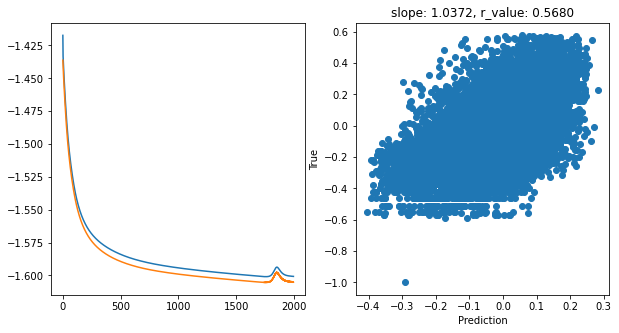


hid_dim: 512, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0458, val_loss: 0.6252, r_value: 0.0520
Epoch 100, train_loss: 0.0350, val_loss: 0.0329, r_value: 0.4944
Epoch 200, train_loss: 0.0348, val_loss: 0.0329, r_value: 0.5054
Epoch 300, train_loss: 0.0340, val_loss: 0.0328, r_value: 0.5199
Epoch 400, train_loss: 0.0331, val_loss: 0.0324, r_value: 0.5327
Epoch 500, train_loss: 0.0323, val_loss: 0.0318, r_value: 0.5429
Epoch 600, train_loss: 0.0315, val_loss: 0.0311, r_value: 0.5513
Epoch 700, train_loss: 0.0308, val_loss: 0.0304, r_value: 0.5579
Epoch 800, train_loss: 0.0301, val_loss: 0.0297, r_value: 0.5630
Epoch 900, train_loss: 0.0295, val_loss: 0.0292, r_value: 0.5672
Epoch 1000, train_loss: 0.0290, val_loss: 0.0287, r_value: 0.5707
Epoch 1100, train_loss: 0.0286, val_loss: 0.0283, r_value: 0.5737
Epoch 1200, train_loss: 0.0283, val_loss: 0.0280, r_value: 0.5764
Epoch 1300, train_loss: 0.0279, val_loss: 0.0276, r_value: 0.5787
Epoch 1400, train_loss: 0.0276, val_loss

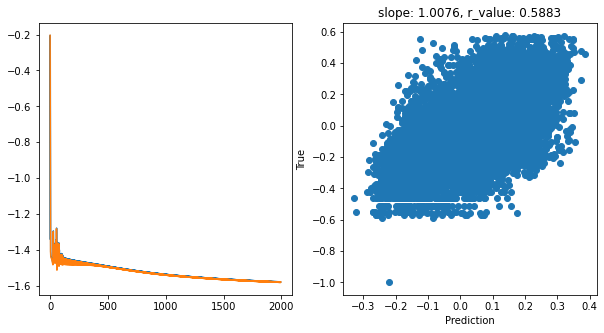


hid_dim: 512, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0367, val_loss: 0.0350, r_value: 0.3153
Epoch 100, train_loss: 0.0314, val_loss: 0.0296, r_value: 0.5187
Epoch 200, train_loss: 0.0292, val_loss: 0.0282, r_value: 0.5383
Epoch 300, train_loss: 0.0280, val_loss: 0.0274, r_value: 0.5516
Epoch 400, train_loss: 0.0272, val_loss: 0.0268, r_value: 0.5597
Epoch 500, train_loss: 0.0266, val_loss: 0.0263, r_value: 0.5652
Epoch 600, train_loss: 0.0262, val_loss: 0.0259, r_value: 0.5692
Epoch 700, train_loss: 0.0259, val_loss: 0.0256, r_value: 0.5724
Epoch 800, train_loss: 0.0257, val_loss: 0.0254, r_value: 0.5753
Epoch 900, train_loss: 0.0255, val_loss: 0.0253, r_value: 0.5777
Epoch 1000, train_loss: 0.0254, val_loss: 0.0251, r_value: 0.5798
Epoch 1100, train_loss: 0.0252, val_loss: 0.0250, r_value: 0.5817
Epoch 1200, train_loss: 0.0251, val_loss: 0.0249, r_value: 0.5833
Epoch 1300, train_loss: 0.0250, val_loss: 0.0248, r_value: 0.5848
Epoch 1400, train_loss: 0.0249, val_loss:

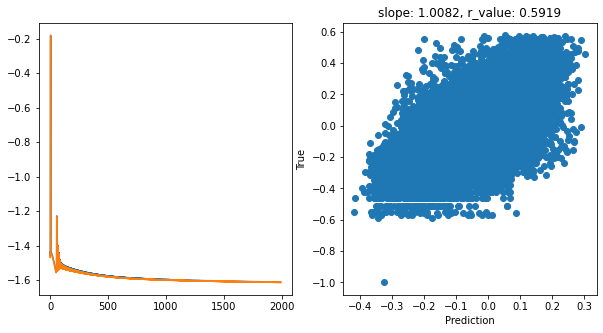


hid_dim: 512, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0402, val_loss: 0.0381, r_value: -0.0979
Epoch 100, train_loss: 0.0274, val_loss: 0.0270, r_value: 0.5218
Epoch 200, train_loss: 0.0266, val_loss: 0.0262, r_value: 0.5358
Epoch 300, train_loss: 0.0262, val_loss: 0.0258, r_value: 0.5440
Epoch 400, train_loss: 0.0260, val_loss: 0.0256, r_value: 0.5491
Epoch 500, train_loss: 0.0262, val_loss: 0.0259, r_value: 0.5529
Epoch 600, train_loss: 0.0260, val_loss: 0.0257, r_value: 0.5556
Epoch 700, train_loss: 0.0258, val_loss: 0.0254, r_value: 0.5579
Epoch 800, train_loss: 0.0257, val_loss: 0.0254, r_value: 0.5600
Epoch 900, train_loss: 0.0256, val_loss: 0.0253, r_value: 0.5617
Epoch 1000, train_loss: 0.0255, val_loss: 0.0252, r_value: 0.5633
Epoch 1100, train_loss: 0.0254, val_loss: 0.0251, r_value: 0.5648
Epoch 1200, train_loss: 0.0253, val_loss: 0.0251, r_value: 0.5663
Epoch 1300, train_loss: 0.0253, val_loss: 0.0250, r_value: 0.5676
Epoch 1400, train_loss: 0.0252, val_loss

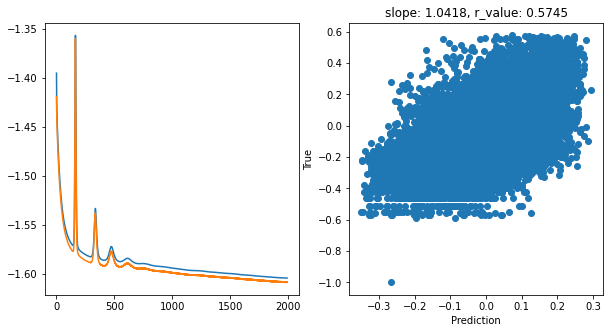

In [14]:
# model.train()
epoch = 2000
hid_dim_range = [128,256,512]
lr_range = [0.75,0.5,0.1]

for hid_dim in hid_dim_range:
    for lr in lr_range:
        print('\nhid_dim: {}, lr: {}'.format(hid_dim, lr))
        if 'model' in globals():
            print('Deleting previous model')
            del model, criterion, optimizer
        model = Feedforward(data.shape[1], hid_dim)
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr = lr)

        all_loss_train=[]
        all_loss_val=[]
        for epoch in range(epoch):
            model.train()
            optimizer.zero_grad()
            # Forward pass
            y_pred = model(X_train)
            # Compute Loss
            loss = criterion(y_pred.squeeze(), y_train)

            # Backward pass
            loss.backward()
            optimizer.step()

            all_loss_train.append(loss.item())

            model.eval()
            with torch.no_grad():
                y_pred = model(X_test)
                # Compute Loss
                loss = criterion(y_pred.squeeze(), y_test)
                all_loss_val.append(loss.item())
            
                if epoch%100==0:
                    y_pred = y_pred.detach().numpy().squeeze()
                    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_test)
                    print('Epoch {}, train_loss: {:.4f}, val_loss: {:.4f}, r_value: {:.4f}'.format(epoch,all_loss_train[-1],all_loss_val[-1],r_value))
                
        fig,ax=plt.subplots(1,2,figsize=(10,5))
        ax[0].plot(np.log10(all_loss_train))
        ax[0].plot(np.log10(all_loss_val))

        ax[1].scatter(y_pred, y_test)
        ax[1].set_xlabel('Prediction')
        ax[1].set_ylabel('True')
        ax[1].set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
        plt.show()

In [15]:
# Try deeper FF
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc3 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc4 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc5 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()
    def forward(self, x):
        hidden = self.relu(self.fc1(x))
        hidden = self.relu(self.fc2(hidden))
        hidden = self.relu(self.fc3(hidden))
        hidden = self.relu(self.fc4(hidden))
        output = self.tanh(self.fc5(hidden))

        return output


hid_dim: 128, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0373, val_loss: 0.0372, r_value: 0.1484
Epoch 100, train_loss: 0.0394, val_loss: 0.0394, r_value: 0.4557
Epoch 200, train_loss: 0.0359, val_loss: 0.0371, r_value: 0.4361
Epoch 300, train_loss: 0.0331, val_loss: 0.0344, r_value: 0.4529
Epoch 400, train_loss: 0.0324, val_loss: 0.0334, r_value: 0.4718
Epoch 500, train_loss: 0.0321, val_loss: 0.0329, r_value: 0.4873
Epoch 600, train_loss: 0.0320, val_loss: 0.0325, r_value: 0.5015
Epoch 700, train_loss: 0.0318, val_loss: 0.0321, r_value: 0.5146
Epoch 800, train_loss: 0.0315, val_loss: 0.0316, r_value: 0.5258
Epoch 900, train_loss: 0.0311, val_loss: 0.0311, r_value: 0.5345
Epoch 1000, train_loss: 0.0305, val_loss: 0.0305, r_value: 0.5408
Epoch 1100, train_loss: 0.0300, val_loss: 0.0299, r_value: 0.5457
Epoch 1200, train_loss: 0.0296, val_loss: 0.0295, r_value: 0.5498
Epoch 1300, train_loss: 0.0292, val_loss: 0.0291, r_value: 0.5530
Epoch 1400, train_loss: 0.0289, val_loss

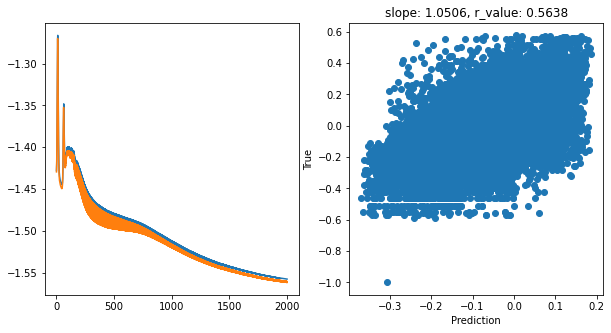


hid_dim: 128, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0392, val_loss: 0.0373, r_value: -0.1593
Epoch 100, train_loss: 0.0321, val_loss: 0.0316, r_value: 0.4797
Epoch 200, train_loss: 0.0324, val_loss: 0.0332, r_value: 0.4713
Epoch 300, train_loss: 0.0304, val_loss: 0.0310, r_value: 0.4947
Epoch 400, train_loss: 0.0294, val_loss: 0.0298, r_value: 0.5126
Epoch 500, train_loss: 0.0288, val_loss: 0.0289, r_value: 0.5264
Epoch 600, train_loss: 0.0282, val_loss: 0.0282, r_value: 0.5376
Epoch 700, train_loss: 0.0277, val_loss: 0.0276, r_value: 0.5458
Epoch 800, train_loss: 0.0273, val_loss: 0.0272, r_value: 0.5518
Epoch 900, train_loss: 0.0269, val_loss: 0.0268, r_value: 0.5563
Epoch 1000, train_loss: 0.0266, val_loss: 0.0264, r_value: 0.5597
Epoch 1100, train_loss: 0.0264, val_loss: 0.0261, r_value: 0.5624
Epoch 1200, train_loss: 0.0262, val_loss: 0.0259, r_value: 0.5645
Epoch 1300, train_loss: 0.0260, val_loss: 0.0258, r_value: 0.5662
Epoch 1400, train_loss: 0.0259, val_loss

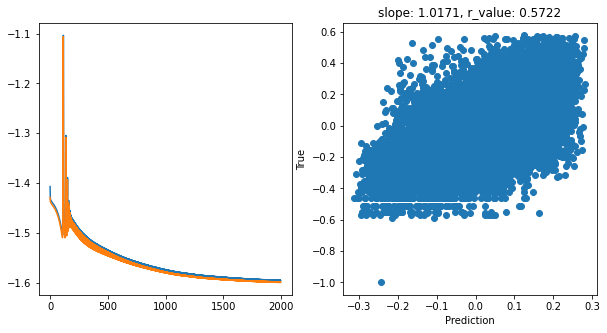


hid_dim: 128, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0389, val_loss: 0.0375, r_value: 0.0934
Epoch 100, train_loss: 0.0362, val_loss: 0.0358, r_value: 0.3076
Epoch 200, train_loss: 0.0356, val_loss: 0.0352, r_value: 0.3654
Epoch 300, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.4075
Epoch 400, train_loss: 0.0333, val_loss: 0.0329, r_value: 0.4384
Epoch 500, train_loss: 0.0315, val_loss: 0.0311, r_value: 0.4633
Epoch 600, train_loss: 0.0295, val_loss: 0.0291, r_value: 0.4867
Epoch 700, train_loss: 0.0280, val_loss: 0.0277, r_value: 0.5066
Epoch 800, train_loss: 0.0271, val_loss: 0.0268, r_value: 0.5209
Epoch 900, train_loss: 0.0267, val_loss: 0.0263, r_value: 0.5305
Epoch 1000, train_loss: 0.0264, val_loss: 0.0260, r_value: 0.5375
Epoch 1100, train_loss: 0.0261, val_loss: 0.0258, r_value: 0.5424
Epoch 1200, train_loss: 0.0260, val_loss: 0.0257, r_value: 0.5458
Epoch 1300, train_loss: 0.0259, val_loss: 0.0256, r_value: 0.5483
Epoch 1400, train_loss: 0.0258, val_loss:

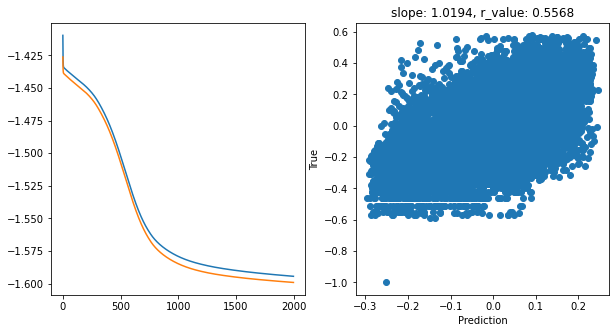


hid_dim: 128, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0376, val_loss: 0.0372, r_value: -0.1016
Epoch 100, train_loss: 0.0370, val_loss: 0.0366, r_value: -0.0717
Epoch 200, train_loss: 0.0370, val_loss: 0.0366, r_value: -0.0385
Epoch 300, train_loss: 0.0369, val_loss: 0.0365, r_value: -0.0043
Epoch 400, train_loss: 0.0369, val_loss: 0.0365, r_value: 0.0320
Epoch 500, train_loss: 0.0369, val_loss: 0.0365, r_value: 0.0708
Epoch 600, train_loss: 0.0368, val_loss: 0.0365, r_value: 0.1087
Epoch 700, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.1422
Epoch 800, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.1700
Epoch 900, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.1937
Epoch 1000, train_loss: 0.0367, val_loss: 0.0364, r_value: 0.2148
Epoch 1100, train_loss: 0.0367, val_loss: 0.0363, r_value: 0.2338
Epoch 1200, train_loss: 0.0367, val_loss: 0.0363, r_value: 0.2511
Epoch 1300, train_loss: 0.0367, val_loss: 0.0363, r_value: 0.2669
Epoch 1400, train_loss: 0.0367, val_

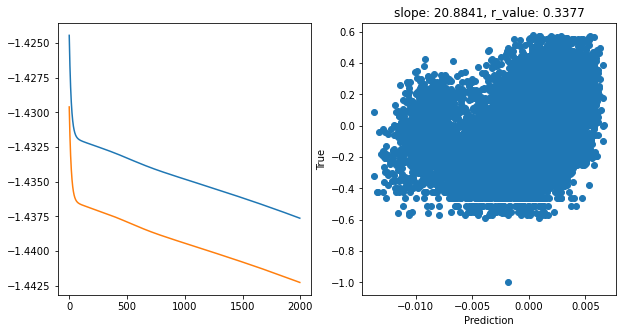


hid_dim: 128, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0372, val_loss: 0.0367, r_value: 0.0048
Epoch 100, train_loss: 0.0366, val_loss: 0.0362, r_value: 0.2854
Epoch 200, train_loss: 0.0362, val_loss: 0.0359, r_value: 0.3750
Epoch 300, train_loss: 0.0359, val_loss: 0.0356, r_value: 0.4130
Epoch 400, train_loss: 0.0356, val_loss: 0.0352, r_value: 0.4345
Epoch 500, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.4492
Epoch 600, train_loss: 0.0347, val_loss: 0.0344, r_value: 0.4598
Epoch 700, train_loss: 0.0341, val_loss: 0.0338, r_value: 0.4685
Epoch 800, train_loss: 0.0334, val_loss: 0.0330, r_value: 0.4757
Epoch 900, train_loss: 0.0324, val_loss: 0.0321, r_value: 0.4821
Epoch 1000, train_loss: 0.0313, val_loss: 0.0310, r_value: 0.4884
Epoch 1100, train_loss: 0.0302, val_loss: 0.0298, r_value: 0.4936
Epoch 1200, train_loss: 0.0292, val_loss: 0.0288, r_value: 0.4989
Epoch 1300, train_loss: 0.0284, val_loss: 0.0280, r_value: 0.5043
Epoch 1400, train_loss: 0.0278, val_loss

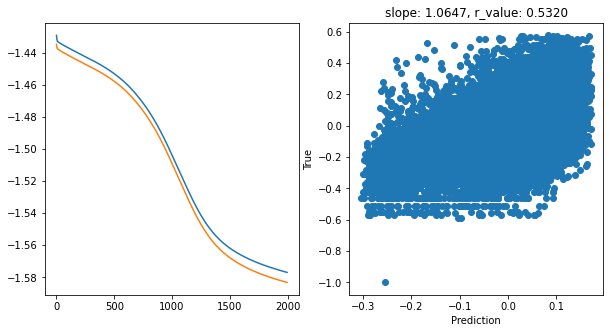


hid_dim: 256, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0410, val_loss: 0.0446, r_value: 0.2588
Epoch 100, train_loss: 0.0395, val_loss: 0.0378, r_value: 0.4959
Epoch 200, train_loss: 0.0361, val_loss: 0.0336, r_value: 0.5012
Epoch 300, train_loss: 0.0346, val_loss: 0.0325, r_value: 0.5152
Epoch 400, train_loss: 0.0337, val_loss: 0.0321, r_value: 0.5261
Epoch 500, train_loss: 0.0329, val_loss: 0.0317, r_value: 0.5365
Epoch 600, train_loss: 0.0321, val_loss: 0.0312, r_value: 0.5454
Epoch 700, train_loss: 0.0313, val_loss: 0.0306, r_value: 0.5518
Epoch 800, train_loss: 0.0306, val_loss: 0.0300, r_value: 0.5560
Epoch 900, train_loss: 0.0299, val_loss: 0.0294, r_value: 0.5589
Epoch 1000, train_loss: 0.0294, val_loss: 0.0290, r_value: 0.5611
Epoch 1100, train_loss: 0.0290, val_loss: 0.0286, r_value: 0.5628
Epoch 1200, train_loss: 0.0286, val_loss: 0.0283, r_value: 0.5643
Epoch 1300, train_loss: 0.0284, val_loss: 0.0280, r_value: 0.5657
Epoch 1400, train_loss: 0.0281, val_loss

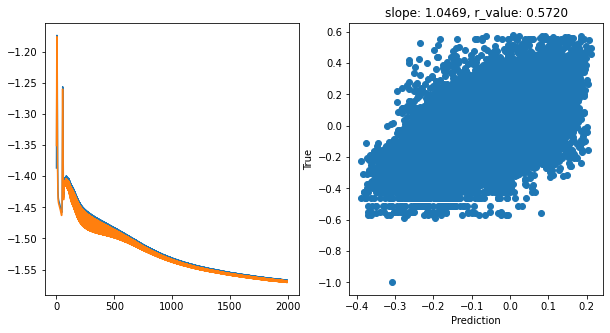


hid_dim: 256, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0394, val_loss: 0.0372, r_value: 0.2825
Epoch 100, train_loss: 0.0401, val_loss: 0.0367, r_value: 0.4948
Epoch 200, train_loss: 0.0319, val_loss: 0.0306, r_value: 0.5148
Epoch 300, train_loss: 0.0303, val_loss: 0.0292, r_value: 0.5296
Epoch 400, train_loss: 0.0293, val_loss: 0.0285, r_value: 0.5403
Epoch 500, train_loss: 0.0285, val_loss: 0.0279, r_value: 0.5483
Epoch 600, train_loss: 0.0279, val_loss: 0.0273, r_value: 0.5540
Epoch 700, train_loss: 0.0274, val_loss: 0.0269, r_value: 0.5582
Epoch 800, train_loss: 0.0270, val_loss: 0.0265, r_value: 0.5614
Epoch 900, train_loss: 0.0267, val_loss: 0.0263, r_value: 0.5639
Epoch 1000, train_loss: 0.0264, val_loss: 0.0260, r_value: 0.5659
Epoch 1100, train_loss: 0.0262, val_loss: 0.0259, r_value: 0.5675
Epoch 1200, train_loss: 0.0260, val_loss: 0.0257, r_value: 0.5689
Epoch 1300, train_loss: 0.0259, val_loss: 0.0256, r_value: 0.5701
Epoch 1400, train_loss: 0.0257, val_loss:

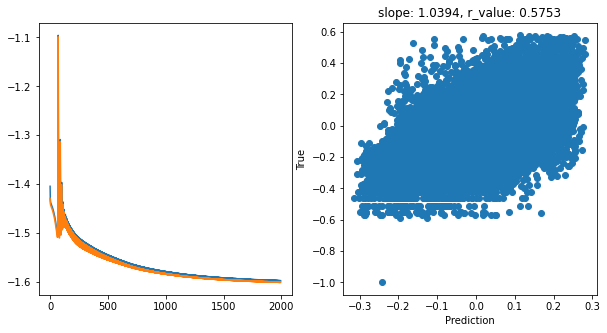


hid_dim: 256, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0391, val_loss: 0.0376, r_value: -0.0073
Epoch 100, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.5005
Epoch 200, train_loss: 0.0344, val_loss: 0.0340, r_value: 0.4993
Epoch 300, train_loss: 0.0321, val_loss: 0.0317, r_value: 0.5011
Epoch 400, train_loss: 0.0293, val_loss: 0.0289, r_value: 0.5079
Epoch 500, train_loss: 0.0275, val_loss: 0.0271, r_value: 0.5183
Epoch 600, train_loss: 0.0268, val_loss: 0.0264, r_value: 0.5285
Epoch 700, train_loss: 0.0264, val_loss: 0.0260, r_value: 0.5368
Epoch 800, train_loss: 0.0261, val_loss: 0.0258, r_value: 0.5430
Epoch 900, train_loss: 0.0259, val_loss: 0.0256, r_value: 0.5477
Epoch 1000, train_loss: 0.0258, val_loss: 0.0254, r_value: 0.5513
Epoch 1100, train_loss: 0.0257, val_loss: 0.0253, r_value: 0.5541
Epoch 1200, train_loss: 0.0256, val_loss: 0.0252, r_value: 0.5564
Epoch 1300, train_loss: 0.0255, val_loss: 0.0252, r_value: 0.5582
Epoch 1400, train_loss: 0.0254, val_loss

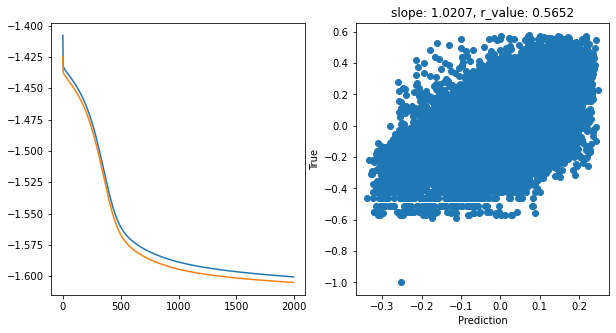


hid_dim: 256, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0403, val_loss: 0.0397, r_value: -0.1768
Epoch 100, train_loss: 0.0369, val_loss: 0.0365, r_value: -0.0038
Epoch 200, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.2312
Epoch 300, train_loss: 0.0367, val_loss: 0.0363, r_value: 0.3537
Epoch 400, train_loss: 0.0365, val_loss: 0.0362, r_value: 0.4118
Epoch 500, train_loss: 0.0364, val_loss: 0.0361, r_value: 0.4425
Epoch 600, train_loss: 0.0363, val_loss: 0.0359, r_value: 0.4619
Epoch 700, train_loss: 0.0362, val_loss: 0.0358, r_value: 0.4750
Epoch 800, train_loss: 0.0361, val_loss: 0.0357, r_value: 0.4821
Epoch 900, train_loss: 0.0360, val_loss: 0.0356, r_value: 0.4869
Epoch 1000, train_loss: 0.0359, val_loss: 0.0355, r_value: 0.4904
Epoch 1100, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.4929
Epoch 1200, train_loss: 0.0356, val_loss: 0.0353, r_value: 0.4948
Epoch 1300, train_loss: 0.0355, val_loss: 0.0352, r_value: 0.4962
Epoch 1400, train_loss: 0.0354, val_lo

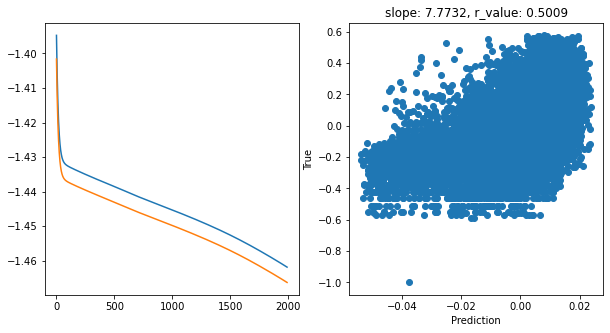


hid_dim: 256, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0375, val_loss: 0.0370, r_value: -0.0756
Epoch 100, train_loss: 0.0364, val_loss: 0.0360, r_value: 0.4232
Epoch 200, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.4511
Epoch 300, train_loss: 0.0352, val_loss: 0.0348, r_value: 0.4615
Epoch 400, train_loss: 0.0345, val_loss: 0.0341, r_value: 0.4652
Epoch 500, train_loss: 0.0335, val_loss: 0.0332, r_value: 0.4679
Epoch 600, train_loss: 0.0324, val_loss: 0.0321, r_value: 0.4715
Epoch 700, train_loss: 0.0312, val_loss: 0.0308, r_value: 0.4764
Epoch 800, train_loss: 0.0301, val_loss: 0.0297, r_value: 0.4826
Epoch 900, train_loss: 0.0291, val_loss: 0.0287, r_value: 0.4898
Epoch 1000, train_loss: 0.0284, val_loss: 0.0280, r_value: 0.4973
Epoch 1100, train_loss: 0.0279, val_loss: 0.0275, r_value: 0.5044
Epoch 1200, train_loss: 0.0275, val_loss: 0.0271, r_value: 0.5108
Epoch 1300, train_loss: 0.0272, val_loss: 0.0269, r_value: 0.5165
Epoch 1400, train_loss: 0.0270, val_los

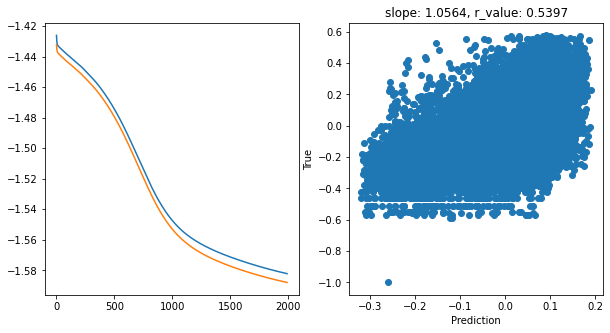


hid_dim: 512, lr: 0.75
Deleting previous model
Epoch 0, train_loss: 0.0370, val_loss: 0.0364, r_value: 0.2444
Epoch 100, train_loss: 0.0374, val_loss: 0.0387, r_value: 0.4517
Epoch 200, train_loss: 0.0335, val_loss: 0.0350, r_value: 0.4642
Epoch 300, train_loss: 0.0327, val_loss: 0.0337, r_value: 0.4954
Epoch 400, train_loss: 0.0321, val_loss: 0.0328, r_value: 0.5171
Epoch 500, train_loss: 0.0316, val_loss: 0.0319, r_value: 0.5317
Epoch 600, train_loss: 0.0309, val_loss: 0.0311, r_value: 0.5424
Epoch 700, train_loss: 0.0303, val_loss: 0.0304, r_value: 0.5502
Epoch 800, train_loss: 0.0298, val_loss: 0.0298, r_value: 0.5559
Epoch 900, train_loss: 0.0293, val_loss: 0.0292, r_value: 0.5602
Epoch 1000, train_loss: 0.0288, val_loss: 0.0288, r_value: 0.5636
Epoch 1100, train_loss: 0.0285, val_loss: 0.0284, r_value: 0.5664
Epoch 1200, train_loss: 0.0281, val_loss: 0.0280, r_value: 0.5686
Epoch 1300, train_loss: 0.0278, val_loss: 0.0278, r_value: 0.5705
Epoch 1400, train_loss: 0.0276, val_loss

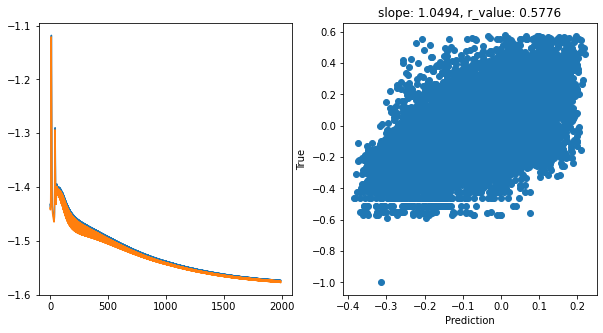


hid_dim: 512, lr: 0.5
Deleting previous model
Epoch 0, train_loss: 0.0374, val_loss: 0.0367, r_value: 0.2427
Epoch 100, train_loss: 0.0350, val_loss: 0.0334, r_value: 0.5088
Epoch 200, train_loss: 0.0317, val_loss: 0.0302, r_value: 0.5213
Epoch 300, train_loss: 0.0302, val_loss: 0.0290, r_value: 0.5350
Epoch 400, train_loss: 0.0292, val_loss: 0.0283, r_value: 0.5456
Epoch 500, train_loss: 0.0284, val_loss: 0.0277, r_value: 0.5536
Epoch 600, train_loss: 0.0278, val_loss: 0.0272, r_value: 0.5595
Epoch 700, train_loss: 0.0272, val_loss: 0.0268, r_value: 0.5638
Epoch 800, train_loss: 0.0268, val_loss: 0.0264, r_value: 0.5671
Epoch 900, train_loss: 0.0264, val_loss: 0.0261, r_value: 0.5696
Epoch 1000, train_loss: 0.0261, val_loss: 0.0258, r_value: 0.5716
Epoch 1100, train_loss: 0.0259, val_loss: 0.0256, r_value: 0.5733
Epoch 1200, train_loss: 0.0257, val_loss: 0.0255, r_value: 0.5747
Epoch 1300, train_loss: 0.0256, val_loss: 0.0254, r_value: 0.5759
Epoch 1400, train_loss: 0.0255, val_loss:

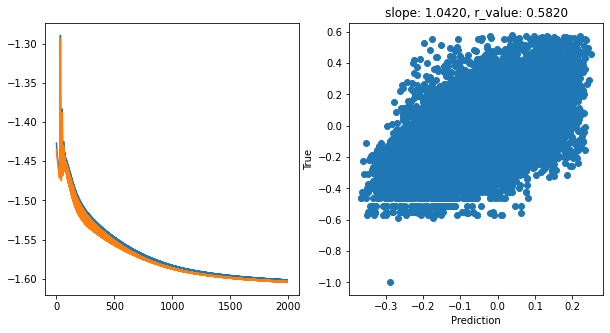


hid_dim: 512, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0369, val_loss: 0.0365, r_value: 0.0973
Epoch 100, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.5013
Epoch 200, train_loss: 0.0319, val_loss: 0.0315, r_value: 0.5091
Epoch 300, train_loss: 0.0285, val_loss: 0.0282, r_value: 0.5197
Epoch 400, train_loss: 0.0268, val_loss: 0.0265, r_value: 0.5315
Epoch 500, train_loss: 0.0263, val_loss: 0.0259, r_value: 0.5407
Epoch 600, train_loss: 0.0260, val_loss: 0.0256, r_value: 0.5471
Epoch 700, train_loss: 0.0258, val_loss: 0.0254, r_value: 0.5514
Epoch 800, train_loss: 0.0256, val_loss: 0.0253, r_value: 0.5545
Epoch 900, train_loss: 0.0255, val_loss: 0.0252, r_value: 0.5569
Epoch 1000, train_loss: 0.0254, val_loss: 0.0251, r_value: 0.5588
Epoch 1100, train_loss: 0.0254, val_loss: 0.0251, r_value: 0.5605
Epoch 1200, train_loss: 0.0253, val_loss: 0.0250, r_value: 0.5619
Epoch 1300, train_loss: 0.0252, val_loss: 0.0250, r_value: 0.5631
Epoch 1400, train_loss: 0.0252, val_loss:

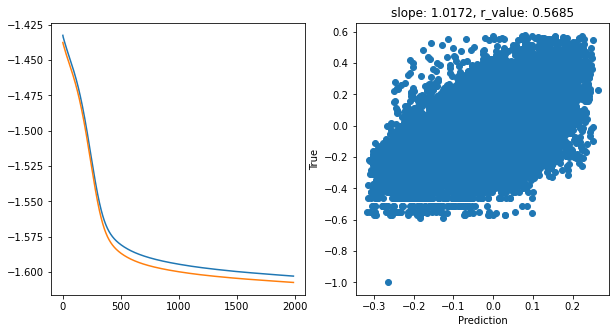


hid_dim: 512, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0385, val_loss: 0.0381, r_value: -0.1635
Epoch 100, train_loss: 0.0368, val_loss: 0.0364, r_value: 0.2001
Epoch 200, train_loss: 0.0366, val_loss: 0.0363, r_value: 0.3878
Epoch 300, train_loss: 0.0365, val_loss: 0.0361, r_value: 0.4541
Epoch 400, train_loss: 0.0363, val_loss: 0.0359, r_value: 0.4754
Epoch 500, train_loss: 0.0361, val_loss: 0.0358, r_value: 0.4826
Epoch 600, train_loss: 0.0360, val_loss: 0.0356, r_value: 0.4844
Epoch 700, train_loss: 0.0358, val_loss: 0.0354, r_value: 0.4844
Epoch 800, train_loss: 0.0356, val_loss: 0.0353, r_value: 0.4839
Epoch 900, train_loss: 0.0355, val_loss: 0.0351, r_value: 0.4832
Epoch 1000, train_loss: 0.0353, val_loss: 0.0349, r_value: 0.4825
Epoch 1100, train_loss: 0.0351, val_loss: 0.0347, r_value: 0.4820
Epoch 1200, train_loss: 0.0349, val_loss: 0.0345, r_value: 0.4818
Epoch 1300, train_loss: 0.0347, val_loss: 0.0343, r_value: 0.4821
Epoch 1400, train_loss: 0.0345, val_los

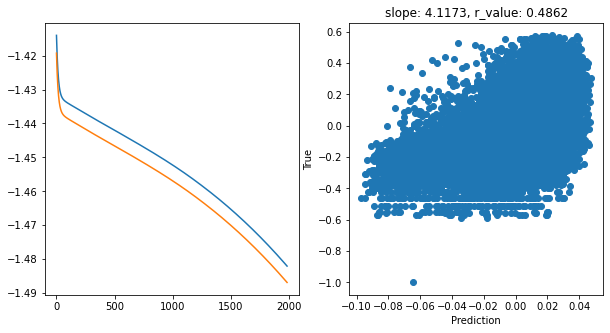


hid_dim: 512, lr: 0.05
Deleting previous model
Epoch 0, train_loss: 0.0393, val_loss: 0.0382, r_value: -0.0864
Epoch 100, train_loss: 0.0361, val_loss: 0.0357, r_value: 0.5113
Epoch 200, train_loss: 0.0352, val_loss: 0.0349, r_value: 0.5169
Epoch 300, train_loss: 0.0342, val_loss: 0.0338, r_value: 0.5148
Epoch 400, train_loss: 0.0328, val_loss: 0.0324, r_value: 0.5136
Epoch 500, train_loss: 0.0311, val_loss: 0.0307, r_value: 0.5143
Epoch 600, train_loss: 0.0293, val_loss: 0.0290, r_value: 0.5162
Epoch 700, train_loss: 0.0280, val_loss: 0.0276, r_value: 0.5198
Epoch 800, train_loss: 0.0272, val_loss: 0.0269, r_value: 0.5244
Epoch 900, train_loss: 0.0268, val_loss: 0.0264, r_value: 0.5292
Epoch 1000, train_loss: 0.0265, val_loss: 0.0262, r_value: 0.5339
Epoch 1100, train_loss: 0.0263, val_loss: 0.0260, r_value: 0.5382
Epoch 1200, train_loss: 0.0262, val_loss: 0.0258, r_value: 0.5419
Epoch 1300, train_loss: 0.0260, val_loss: 0.0257, r_value: 0.5450
Epoch 1400, train_loss: 0.0259, val_los

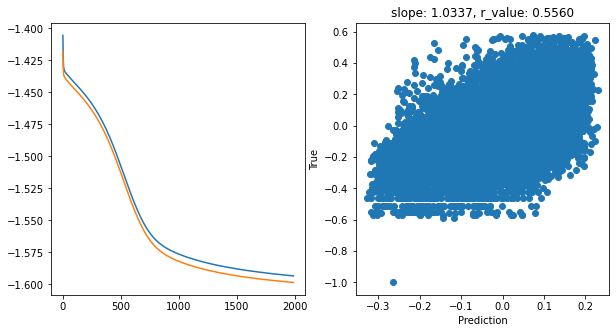

In [16]:
# model.train()
epoch = 2000
hid_dim_range = [128,256,512]
lr_range = [0.75,0.5,0.1,0.01,0.05]

for hid_dim in hid_dim_range:
    for lr in lr_range:
        print('\nhid_dim: {}, lr: {}'.format(hid_dim, lr))
        if 'model' in globals():
            print('Deleting previous model')
            del model, criterion, optimizer
        model = Feedforward(data.shape[1], hid_dim)
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr = lr)

        all_loss_train=[]
        all_loss_val=[]
        for epoch in range(epoch):
            model.train()
            optimizer.zero_grad()
            # Forward pass
            y_pred = model(X_train)
            # Compute Loss
            loss = criterion(y_pred.squeeze(), y_train)

            # Backward pass
            loss.backward()
            optimizer.step()

            all_loss_train.append(loss.item())

            model.eval()
            with torch.no_grad():
                y_pred = model(X_test)
                # Compute Loss
                loss = criterion(y_pred.squeeze(), y_test)
                all_loss_val.append(loss.item())
            
                if epoch%100==0:
                    y_pred = y_pred.detach().numpy().squeeze()
                    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_test)
                    print('Epoch {}, train_loss: {:.4f}, val_loss: {:.4f}, r_value: {:.4f}'.format(epoch,all_loss_train[-1],all_loss_val[-1],r_value))
                
        fig,ax=plt.subplots(1,2,figsize=(10,5))
        ax[0].plot(np.log10(all_loss_train))
        ax[0].plot(np.log10(all_loss_val))

        ax[1].scatter(y_pred, y_test)
        ax[1].set_xlabel('Prediction')
        ax[1].set_ylabel('True')
        ax[1].set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
        plt.show()

We have tested SGD extensively. Now let's see what other optimizers have to offer (BACK TO SLIDES)


hid_dim: 128, lr: 0.1
Deleting previous model


/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Epoch 0, train_loss: 0.0447, val_loss: 1.0370, r_value: 0.0000
Epoch 100, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 200, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 300, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 400, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000


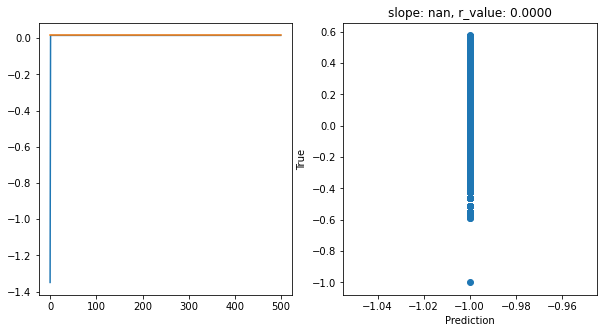


hid_dim: 128, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0407, val_loss: 0.1065, r_value: 0.2456
Epoch 100, train_loss: 0.0250, val_loss: 0.0247, r_value: 0.5683
Epoch 200, train_loss: 0.0240, val_loss: 0.0239, r_value: 0.5913
Epoch 300, train_loss: 0.0232, val_loss: 0.0233, r_value: 0.6031
Epoch 400, train_loss: 0.0238, val_loss: 0.0241, r_value: 0.6070


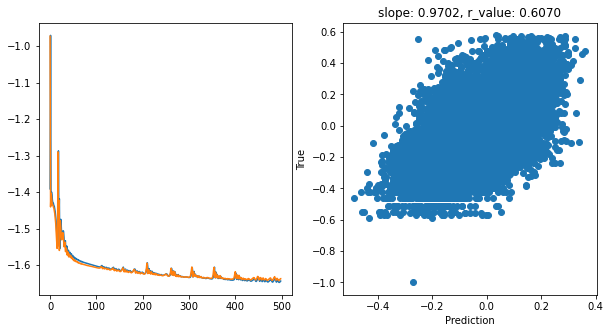


hid_dim: 128, lr: 0.05
Deleting previous model


/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Epoch 0, train_loss: 0.0415, val_loss: 1.0370, r_value: 0.0000
Epoch 100, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 200, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 300, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 400, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000


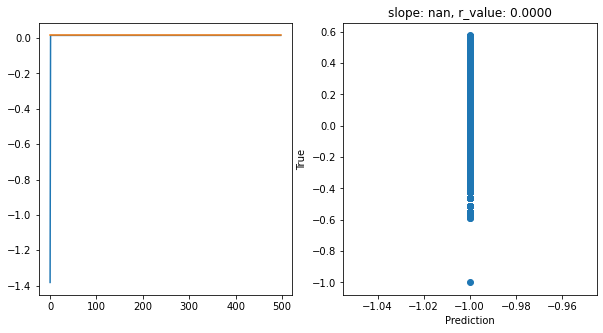


hid_dim: 128, lr: 0.001
Deleting previous model
Epoch 0, train_loss: 0.0371, val_loss: 0.0364, r_value: 0.3117
Epoch 100, train_loss: 0.0241, val_loss: 0.0239, r_value: 0.5877
Epoch 200, train_loss: 0.0230, val_loss: 0.0231, r_value: 0.6083
Epoch 300, train_loss: 0.0224, val_loss: 0.0228, r_value: 0.6166
Epoch 400, train_loss: 0.0218, val_loss: 0.0224, r_value: 0.6219


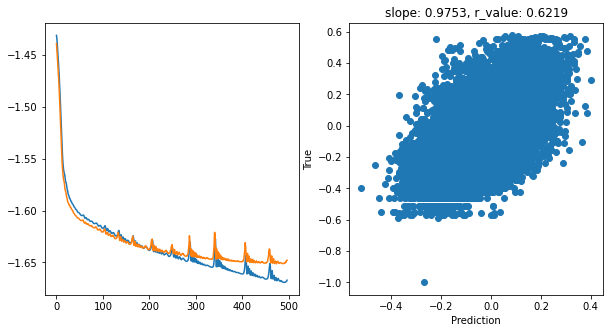


hid_dim: 256, lr: 0.1
Deleting previous model
Epoch 0, train_loss: 0.0370, val_loss: 1.0370, r_value: -0.1892


/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Epoch 100, train_loss: 1.0372, val_loss: 1.0361, r_value: 0.0000
Epoch 200, train_loss: 1.0372, val_loss: 1.0361, r_value: 0.0000
Epoch 300, train_loss: 1.0372, val_loss: 1.0361, r_value: 0.0000
Epoch 400, train_loss: 1.0372, val_loss: 1.0361, r_value: 0.0000


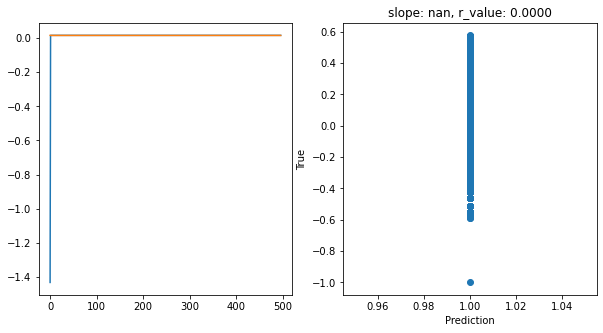


hid_dim: 256, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0399, val_loss: 0.8095, r_value: 0.1103
Epoch 100, train_loss: 0.0244, val_loss: 0.0242, r_value: 0.5838
Epoch 200, train_loss: 0.0239, val_loss: 0.0235, r_value: 0.5981
Epoch 300, train_loss: 0.0232, val_loss: 0.0235, r_value: 0.6064
Epoch 400, train_loss: 0.0226, val_loss: 0.0231, r_value: 0.6115


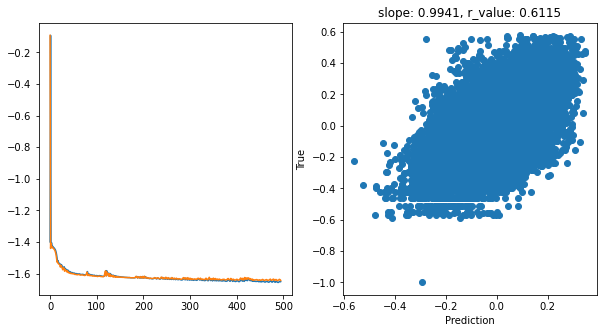


hid_dim: 256, lr: 0.05
Deleting previous model


/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Epoch 0, train_loss: 0.0370, val_loss: 1.0370, r_value: 0.0000
Epoch 100, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 200, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 300, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 400, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000


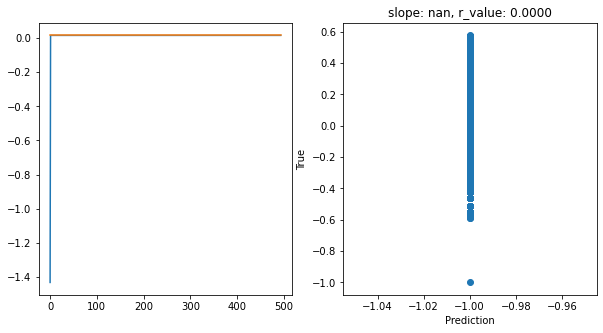


hid_dim: 256, lr: 0.001
Deleting previous model
Epoch 0, train_loss: 0.0372, val_loss: 0.0371, r_value: 0.4011
Epoch 100, train_loss: 0.0238, val_loss: 0.0238, r_value: 0.5994
Epoch 200, train_loss: 0.0225, val_loss: 0.0229, r_value: 0.6171
Epoch 300, train_loss: 0.0214, val_loss: 0.0224, r_value: 0.6265
Epoch 400, train_loss: 0.0206, val_loss: 0.0221, r_value: 0.6294


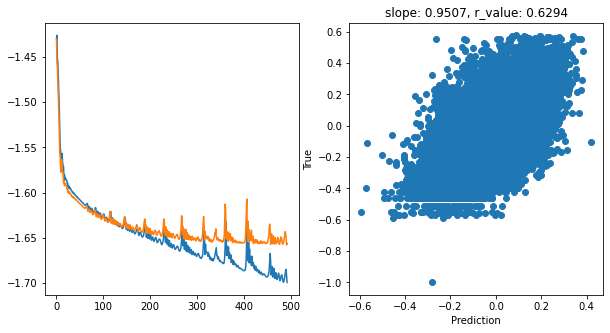


hid_dim: 512, lr: 0.1
Deleting previous model


/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Epoch 0, train_loss: 0.0370, val_loss: 1.0370, r_value: 0.0000
Epoch 100, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 200, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 300, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 400, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000


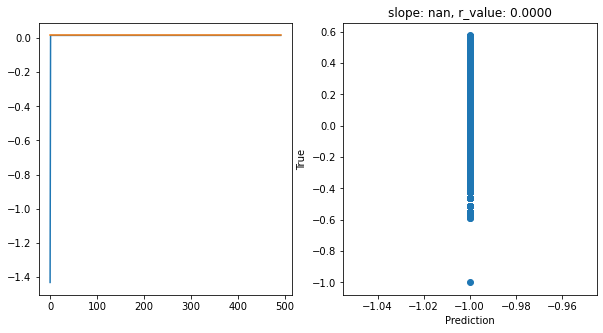


hid_dim: 512, lr: 0.01
Deleting previous model
Epoch 0, train_loss: 0.0399, val_loss: 1.0361, r_value: 0.1849


/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Epoch 100, train_loss: 1.0372, val_loss: 1.0361, r_value: 0.0000
Epoch 200, train_loss: 1.0372, val_loss: 1.0361, r_value: 0.0000
Epoch 300, train_loss: 1.0372, val_loss: 1.0361, r_value: 0.0000
Epoch 400, train_loss: 1.0372, val_loss: 1.0361, r_value: 0.0000


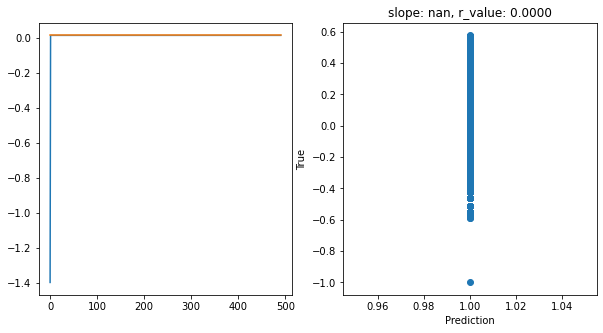


hid_dim: 512, lr: 0.05
Deleting previous model


/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/antonio/opt/anaconda3/envs/geo_comp/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Epoch 0, train_loss: 0.0377, val_loss: 1.0370, r_value: 0.0000
Epoch 100, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 200, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 300, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000
Epoch 400, train_loss: 1.0366, val_loss: 1.0370, r_value: 0.0000


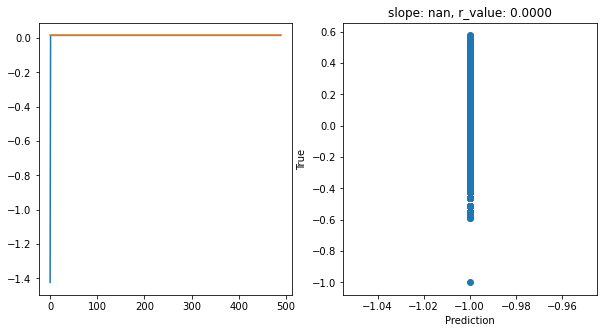


hid_dim: 512, lr: 0.001
Deleting previous model
Epoch 0, train_loss: 0.0368, val_loss: 0.0361, r_value: 0.4858
Epoch 100, train_loss: 0.0243, val_loss: 0.0246, r_value: 0.5991
Epoch 200, train_loss: 0.0221, val_loss: 0.0226, r_value: 0.6204
Epoch 300, train_loss: 0.0212, val_loss: 0.0221, r_value: 0.6294
Epoch 400, train_loss: 0.0199, val_loss: 0.0220, r_value: 0.6329


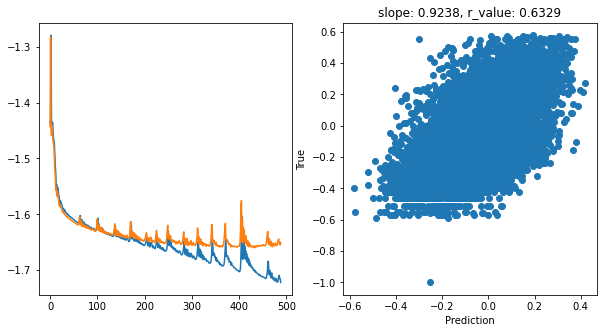

In [17]:
# Try ADAM optimizer
epoch = 500
hid_dim_range = [128,256,512]
lr_range = [0.1,0.01,0.05,0.001]

for hid_dim in hid_dim_range:
    for lr in lr_range:
        print('\nhid_dim: {}, lr: {}'.format(hid_dim, lr))
        if 'model' in globals():
            print('Deleting previous model')
            del model, criterion, optimizer
        model = Feedforward(data.shape[1], hid_dim)
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        all_loss_train=[]
        all_loss_val=[]
        for epoch in range(epoch):
            model.train()
            optimizer.zero_grad()
            # Forward pass
            y_pred = model(X_train)
            # Compute Loss
            loss = criterion(y_pred.squeeze(), y_train)

            # Backward pass
            loss.backward()
            optimizer.step()

            all_loss_train.append(loss.item())

            model.eval()
            with torch.no_grad():
                y_pred = model(X_test)
                # Compute Loss
                loss = criterion(y_pred.squeeze(), y_test)
                all_loss_val.append(loss.item())
            
                if epoch%100==0:
                    y_pred = y_pred.detach().numpy().squeeze()
                    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, y_test)
                    print('Epoch {}, train_loss: {:.4f}, val_loss: {:.4f}, r_value: {:.4f}'.format(epoch,all_loss_train[-1],all_loss_val[-1],r_value))
                
        fig,ax=plt.subplots(1,2,figsize=(10,5))
        ax[0].plot(np.log10(all_loss_train))
        ax[0].plot(np.log10(all_loss_val))

        ax[1].scatter(y_pred, y_test)
        ax[1].set_xlabel('Prediction')
        ax[1].set_ylabel('True')
        ax[1].set_title('slope: {:.4f}, r_value: {:.4f}'.format(slope, r_value))
        plt.show()

ADAM seems to be quite effective for training in this setup if compared to other tests we did. Now let's see how we can add a degree of interpretability to the model. 

In [18]:
import shap

test_images= X_test[100:110]
test_labels=y_test[100:110]

explainer = shap.DeepExplainer(model, X_test)
shap_values = explainer.shap_values(test_images)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Test loss after Training 0.025363940745592117


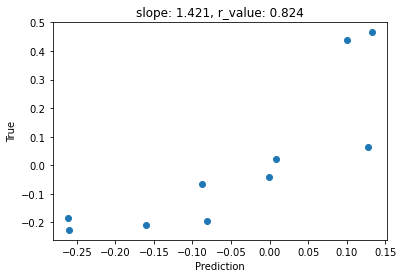

In [19]:
model.eval()
with torch.no_grad():
    y_pred = model(test_images)
    after_train = criterion(y_pred.squeeze(), test_labels) 
    print('Test loss after Training' , after_train.item())

    y_pred = y_pred.detach().numpy().squeeze()
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_pred, test_labels)

    fig,ax=plt.subplots()
    ax.scatter(y_pred, test_labels)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('True')
    ax.set_title('slope: {:.3f}, r_value: {:.3f}'.format(slope, r_value))

In [38]:
print(test_labels.mean())
print(y_pred.mean())

tensor(0.0070)
-0.048042446


(10, 20)


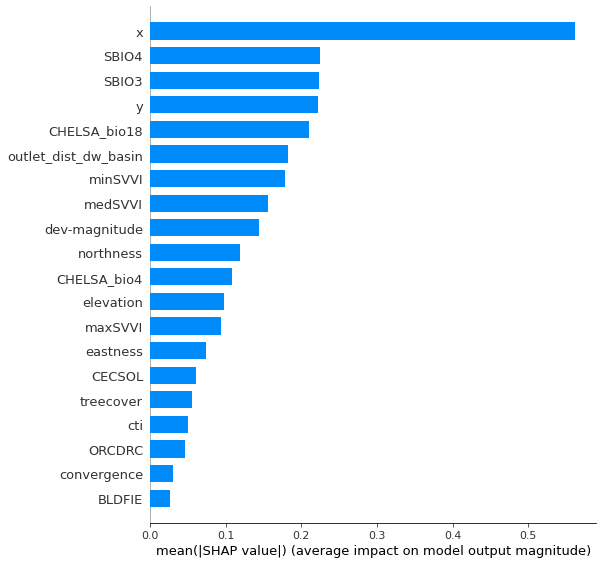

In [20]:
#SHAP global interpretation
# The summary plot shows the most important features and the magnitude of their impact on the model. It is the global interpretation.

print(shap_values.shape)
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = data.columns, max_display=21)

In [70]:
# SHAP Local Interpretation

# The force plot is good to see where the “output value” fits in relation to the “base value”. We also see which features have a positive 
#  (red) or negative (blue) impact on the prediction and the magnitude of the impact.
shap.initjs()
print('output for the first sample: f(x)= ',y_pred[0])
print(explainer.expected_value[0])
shap.force_plot(explainer.expected_value[0], shap_values[2], test_images[2,:].numpy(), feature_names = data.columns)

output for the first sample: f(x)=  0.0084513
-0.013382731


In [22]:
shap.force_plot(explainer.expected_value[0], shap_values, test_images.numpy(), link="logit",feature_names = data.columns)

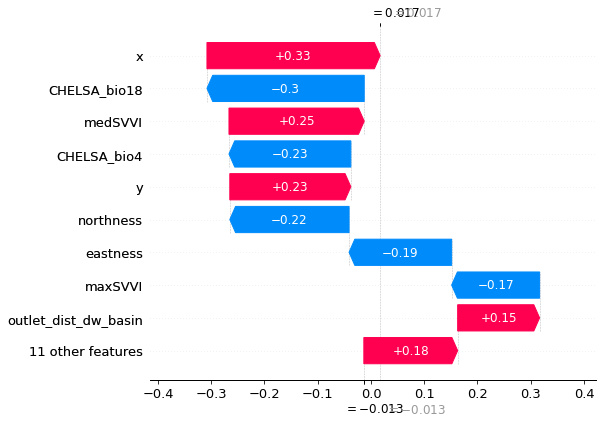

In [36]:
'''
The waterfall plot also allows us to see the amplitude and the nature of the impact of a feature. 
It also allows seeing the order of importance of the features and the values taken by each feature for the sample.
'''
plt.figure(facecolor='w')
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[2], feature_names = data.columns)